In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.shape

(418, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


Age

In [6]:
df['Age'].describe()

,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


<Axes: ylabel='Frequency'>

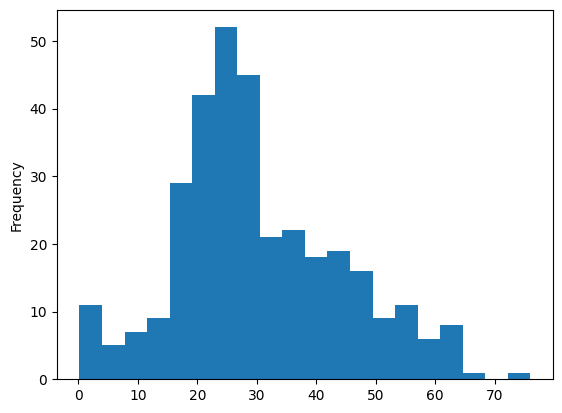

In [7]:
df['Age'].plot(kind='hist',bins=20)

In [8]:
df['Age'].isnull().sum()/len(df['Age'])

np.float64(0.20574162679425836)

**conclusions**

- Age is normally(almost) distributed
- 25% of the values are missing
- There are some outliers

Fare

In [10]:
df['Fare'].describe()

,Fare
count,417.000000
mean,35.627188
std,55.907576
min,0.000000
25%,7.895800
50%,14.454200
75%,31.500000
max,512.329200


<Axes: ylabel='Density'>

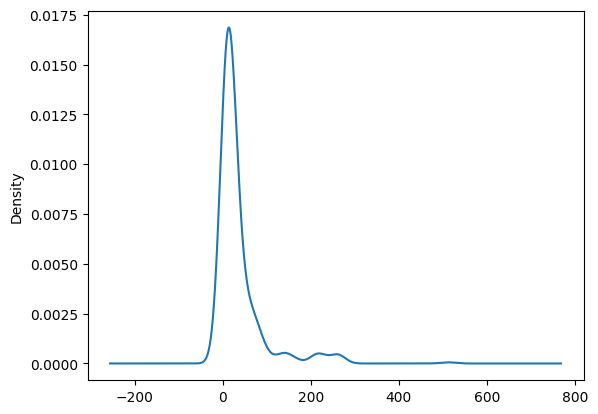

In [11]:
df['Fare'].plot(kind='kde')

In [12]:
df['Fare'].skew()

np.float64(3.6872133081121405)

<Axes: >

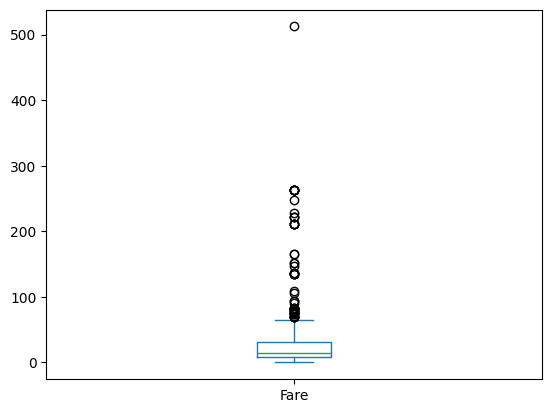

In [13]:
df['Fare'].plot(kind='box')


**conclusions**

- The data is highly(positively) skewed
- Fare col actually contains the group fare and not the individual fare(This migth be and issue)
- We need to create a new col called individual fare

Survived

In [14]:
df['Embarked'].value_counts()

,count
Embarked,
S,270
C,102
Q,46


<Axes: ylabel='count'>

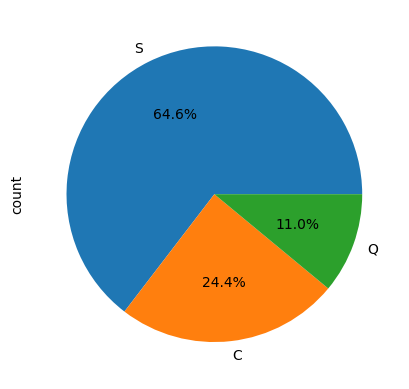

In [15]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

- Parch and SibSp cols can be merged to form  a new col call family_size
- Create a new col called is_alone

In [17]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [18]:
df['is_alone'] = df['family_size'].apply(lambda x: 1 if x==1 else 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,is_alone
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0


Bivariate Analysis

<Axes: xlabel='Pclass', ylabel='Survived'>

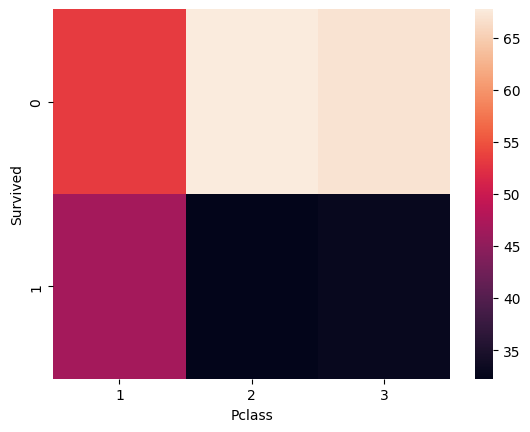

In [19]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

In [20]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,0.0,100.0
1,100.0,0.0


In [21]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,60.784314,47.826087,67.407407
1,39.215686,52.173913,32.592593


In [22]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,39.215686,52.173913,32.592593
male,60.784314,47.826087,67.407407


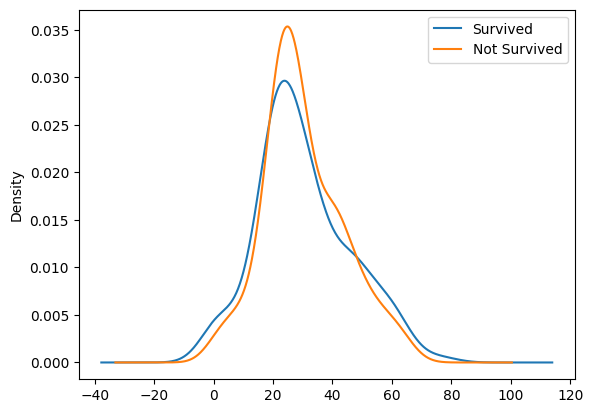

In [23]:
# survived and age

df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

Feature Engineering on Fare col

In [24]:
df['SibSp'].value_counts()

,count
SibSp,
0,283
1,110
2,14
3,4
4,4
8,2
5,1


In [25]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,is_alone
188,1080,1,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,0
342,1234,0,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,11,0
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,11,0
365,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S,11,0


In [26]:
df['individual_fare'] = df['Fare']/(df['SibSp'] + df['Parch'] + 1)

In [27]:
df[['individual_fare','Fare']].describe()

,individual_fare,Fare
count,417.000000,417.000000
mean,21.804161,35.627188
std,35.639766,55.907576
min,0.000000,0.000000
25%,7.629200,7.895800
50%,8.662500,14.454200
75%,26.000000,31.500000
max,262.375000,512.329200


Feature Engineering on Fare col

In [29]:
df['surname'] = df['Name'].str.split(',').str.get(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,is_alone,individual_fare,surname
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,7.829200,Kelly
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,3.500000,Wilkes
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,9.687500,Myles
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,8.662500,Wirz
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0,4.095833,Hirvonen


In [30]:
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

Cabin(most of the values are null)

In [31]:
df['deck'].value_counts()

KeyError: 'deck'

In [34]:
df['Cabin'].str[0].value_counts()

,count
Cabin,
C,35
B,18
D,13
E,9
F,8
A,7
G,1


In [33]:
df['Cabin'].isnull().sum()/len(df['Cabin'])

np.float64(0.7822966507177034)